# Библиотеки

In [41]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Импорт набора данных

In [ ]:
#подключиться к google диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
%run '/content/drive/MyDrive/Learning_DS_SMM_etc/Data Scientist с нуля до middle/Менеджмент дата-проектов/Сохранение результатов эксперимента/HomeWork_wine_quality/scripts/get_wine_quality_dataset.py'

Файл 'wine_quality_dataset.csv' успешно скачан.


# Исследовательский анализ данных

In [17]:
df = pd.read_csv('wine_quality_dataset.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [20]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [22]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

Типы вина не сбалансированы. В датасете в три раза больше записей о белом вине, чем о красном

In [23]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Итоговые оценки вина также не сбалансированы. Низких классов (оценки 3 и 4), а также высоких классов (оценки 8 и 9) значительно меньше, чем средних классов (оценки 5-7)

<ipython-input-26-d343b0225345>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


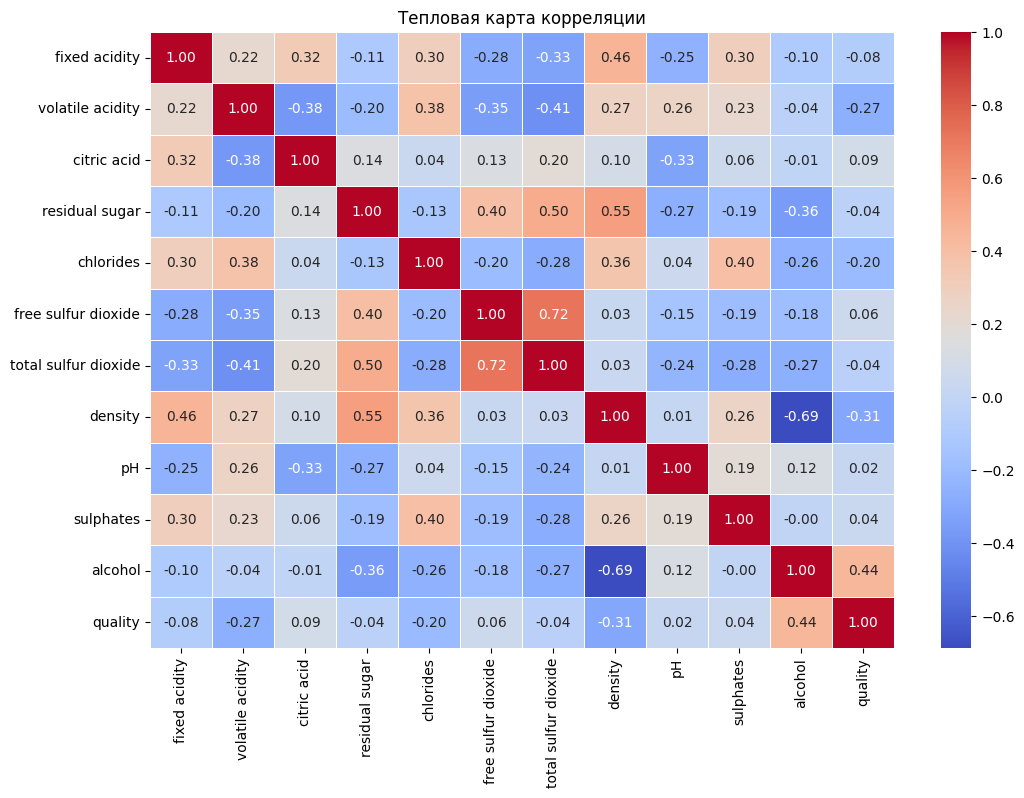

In [26]:
# Матрица корреляции
correlation_matrix = df.corr()

# Тепловая карта
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Тепловая карта корреляции")
plt.show()

# Предобработка

Значений null в масштабе набора данных ничтожно мало. Решил их удалить

In [27]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


Label Encoding для категориальных признаков

In [36]:
# Объект LabelEncoder
label_encoder = LabelEncoder()

# Применение Label Encoding к категориальному столбцу 'type'
df['type'] = label_encoder.fit_transform(df['type'])

Нормирование признаков

In [40]:
# Объект StandardScaler
scaler = StandardScaler()

# Стандартизация числовых признаков
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df[numeric_features] = scaler.fit_transform(df[numeric_features])


Сохранение файла

In [43]:
file_wine = '/content/drive/MyDrive/Learning_DS_SMM_etc/Data Scientist с нуля до middle/Менеджмент дата-проектов/Сохранение результатов эксперимента/HomeWork_wine_quality/data/processed/winequality_proc'

In [44]:

df.to_csv(file_wine, index=False)

# Работа с признаками, выбор характеристик и размерность

Оставил все признаки для построения модели

# Разбиение данных на обучающие и тестовые наборы

In [45]:
df = pd.read_csv(file_wine)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,6
1,1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,6
2,1,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,6
3,1,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6
4,1,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,0,-0.321892,1.703315,-1.643871,-0.745079,0.340545,-0.141736,-1.374580,0.603864,1.255423,1.939871,-0.832184,6
6459,0,-0.784208,1.581828,-1.643871,-0.724055,0.967807,0.083522,-1.268427,0.067414,1.442179,0.328071,0.006014,5
6460,0,-0.707155,1.035136,-1.299616,-0.660984,0.568640,-0.085421,-1.339195,0.347301,1.255423,1.469762,0.425113,6
6461,0,-1.015366,1.855174,-1.368467,-0.724055,0.540129,0.083522,-1.268427,0.257337,2.189203,1.201129,-0.245446,5


In [46]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели, тестирование и оценка

In [47]:
# Модель градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Обучение
gb_model.fit(X_train, y_train)

# Прогнозы на тестовых данных
y_pred = gb_model.predict(X_test)

# Оценка производительности модели
print("Метрики оценки производительности:")
print(classification_report(y_test, y_pred))

# Сconfusion matrix для оценки качества классификации
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Метрики оценки производительности:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.16      0.06      0.09        48
           5       0.66      0.60      0.63       430
           6       0.56      0.74      0.64       540
           7       0.60      0.39      0.47       228
           8       0.58      0.17      0.26        42
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1293
   macro avg       0.36      0.28      0.30      1293
weighted avg       0.58      0.59      0.57      1293

Матрица ошибок:
[[  0   1   2   1   0   0   0]
 [  3   3  24  18   0   0   0]
 [  1  13 257 152   7   0   0]
 [  1   2  96 400  38   3   0]
 [  0   0  11 125  90   2   0]
 [  0   0   0  20  15   7   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
